In [1]:
import matplotlib.pyplot as plt
import numpy as np

import triangle as tr


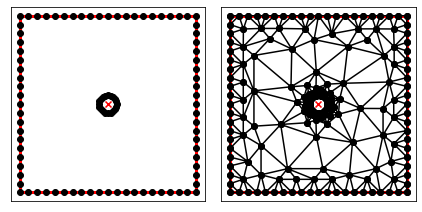

In [2]:
N = 20
M = 20
gran1 = np.array([[-0.5+i/M,-0.5] for i in range(0,M)])
gran2 = np.array([[0.5,-0.5 +i/M] for i in range(0,M)])
gran3 = np.array([[0.5-i/M,0.5] for i in range(0,M)])
gran4 = np.array([[-0.5, 0.5-i/M] for i in range(0,M)])
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
pts = np.stack([np.cos(theta)*0.05, np.sin(theta)*0.05], axis=1)
pts = np.vstack([pts,gran1,gran2,gran3,gran4])
s = np.vstack([np.array([[i,i+1] for i in range(N-1)]),[0,N-1],np.array([[i,i+1] for i in range(N,N+4*M-1)]),[N+4*M-1,N]])
A = dict(vertices=pts,segments = s,holes = [[0,0]])
B = tr.triangulate(A, 'qpa')
tr.compare(plt, A, B)

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
nud = B['vertices']
nud_num = len(B['vertices'])
el = B['triangles']
el_num = len(B['triangles'])


In [3]:
print(nud_num, el_num)

180 260


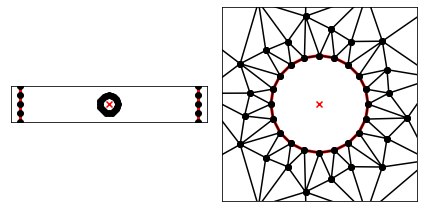

In [4]:
tr.compare(plt, A, B)
plt.xlim([-0.1,0.1])
plt.ylim([-0.1,0.1])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
title =  'new_new'
f = open(title, 'w')
f.write('0.3 2000\n')

9

In [6]:
f.write(str(nud_num)+'\n')
for i in nud:
    f.write(str(i[0])+ ' '+str(i[1])+'\n')

In [7]:
f.write(str(el_num)+'\n')
print(el_num,len(el))
for i in el:
    f.write(str(i[0])+' '+str(i[1])+' '+str(i[2])+'\n')
for i in range(len(el)):
    for j in range(3):
        if el[i,j] == 0:
            print(i)

260 260
19
64
192


In [8]:
f.write('0\n')

2

In [9]:
q1 = np.matrix([0,0,0])
for i in range(nud_num):
    if nud[i,0] == 0.5:
        q1 = np.append(q1,[np.append(nud[i,:],i)],axis =0)
q1 = np.delete(q1,0,axis=0)
q1 = np.sort(q1, axis = 0)
q1_num = len(q1)


In [10]:
q2 = np.matrix([0,0,0])
for i in range(nud_num):
    if nud[i,0] == -0.5:
        q2 = np.append(q2,[np.append(nud[i,:],i)],axis =0)
q2 = np.delete(q2,0,axis=0)
q2 = np.sort(q2, axis = 0)
q2_num = len(q2)

In [11]:
# нагрузка на линию
q = 1000
eff = np.matrix([[0,0,0]])
h = np.sqrt((q1[0,0]-q1[1,0])**2 + (q1[0,1] -q1[1,1])**2)

eff = np.append(eff,[[q1[0,2], h*q/2, 0]],axis = 0)
eff = np.delete(eff,0,axis = 0)

for i in range(1,q1_num-1):
    h1 = np.sqrt((q1[i-1,0]-q1[i,0])**2 + (q1[i-1,1] -q1[i,1])**2)
    h2 =  np.sqrt((q1[i+1,0]-q1[i,0])**2 + (q1[i,1] -q1[1+i,1])**2)
    h = h1+h2
    eff = np.append(eff,[[q1[i,2], h*q/2, 0]],axis = 0)
h =  np.sqrt((q1[-1,0]-q1[-2,0])**2 + (q1[-1,1] -q1[-2,1])**2)
eff = np.append(eff,[[q1[-1,2], h*q/2, 0]],axis = 0)

In [12]:
q = -1000

h = np.sqrt((q2[0,0]-q2[1,0])**2 + (q2[0,1] -q2[1,1])**2)
eff = np.append(eff,[[q2[0,2], h*q/2, 0]],axis = 0)


for i in range(1,q2_num-1):
    h1 = np.sqrt((q2[i-1,0]-q2[i,0])**2 + (q2[i-1,1] -q2[i,1])**2)
  
    h2 =  np.sqrt((q2[i+1,0]-q2[i,0])**2 + (q2[i,1] -q2[1+i,1])**2)
    h = h1+h2
    eff = np.append(eff,[[q2[i,2], h*q/2, 0]],axis = 0)
h =  np.sqrt((q2[-1,0]-q2[-2,0])**2 + (q2[-1,1] -q2[-2,1])**2)
eff = np.append(eff,[[q2[-1,2], h*q/2, 0]],axis = 0)
eff = np.sort(eff, axis = 0)

print(eff)



[[ 20. -50.   0.]
 [ 40. -50.   0.]
 [ 41. -50.   0.]
 [ 42. -50.   0.]
 [ 43. -50.   0.]
 [ 44. -50.   0.]
 [ 45. -50.   0.]
 [ 46. -50.   0.]
 [ 47. -50.   0.]
 [ 48. -50.   0.]
 [ 49. -50.   0.]
 [ 50. -50.   0.]
 [ 51. -50.   0.]
 [ 52. -50.   0.]
 [ 53. -50.   0.]
 [ 54. -50.   0.]
 [ 55. -50.   0.]
 [ 56. -50.   0.]
 [ 57. -50.   0.]
 [ 58. -25.   0.]
 [ 59. -25.   0.]
 [ 60.  25.   0.]
 [ 80.  25.   0.]
 [ 81.  50.   0.]
 [ 82.  50.   0.]
 [ 83.  50.   0.]
 [ 84.  50.   0.]
 [ 85.  50.   0.]
 [ 86.  50.   0.]
 [ 87.  50.   0.]
 [ 88.  50.   0.]
 [ 89.  50.   0.]
 [ 90.  50.   0.]
 [ 91.  50.   0.]
 [ 92.  50.   0.]
 [ 93.  50.   0.]
 [ 94.  50.   0.]
 [ 95.  50.   0.]
 [ 96.  50.   0.]
 [ 97.  50.   0.]
 [ 98.  50.   0.]
 [ 99.  50.   0.]]


In [13]:
print(len(eff))
f.write(str(len(eff))+'\n')

42


3

In [14]:
for i in range(0,len(eff)):
    print(str(int(eff[i,0]))+' '+str(eff[i,1])+' '+str(eff[1,2]))
    f.write(str(int(eff[i,0]))+' '+str(eff[i,1])+' '+str(eff[1,2])+'\n')
f.write('0\n')
f.close()

20 -50.00000000000004 0.0
40 -50.000000000000014 0.0
41 -50.000000000000014 0.0
42 -50.000000000000014 0.0
43 -50.000000000000014 0.0
44 -50.000000000000014 0.0
45 -49.999999999999986 0.0
46 -49.999999999999986 0.0
47 -49.999999999999986 0.0
48 -49.999999999999986 0.0
49 -49.999999999999986 0.0
50 -49.999999999999986 0.0
51 -49.999999999999986 0.0
52 -49.999999999999986 0.0
53 -49.999999999999986 0.0
54 -49.999999999999986 0.0
55 -49.999999999999986 0.0
56 -49.999999999999986 0.0
57 -49.999999999999986 0.0
58 -25.00000000000002 0.0
59 -24.999999999999993 0.0
60 24.999999999999993 0.0
80 25.00000000000002 0.0
81 49.999999999999986 0.0
82 49.999999999999986 0.0
83 49.999999999999986 0.0
84 49.999999999999986 0.0
85 49.999999999999986 0.0
86 49.999999999999986 0.0
87 49.999999999999986 0.0
88 49.999999999999986 0.0
89 49.999999999999986 0.0
90 49.999999999999986 0.0
91 49.999999999999986 0.0
92 49.999999999999986 0.0
93 49.999999999999986 0.0
94 50.000000000000014 0.0
95 50.00000000000001

#### какие узлы на окружности???

In [15]:
pts[:-4,:]


array([[ 5.00000000e-02,  0.00000000e+00],
       [ 4.75528258e-02,  1.54508497e-02],
       [ 4.04508497e-02,  2.93892626e-02],
       [ 2.93892626e-02,  4.04508497e-02],
       [ 1.54508497e-02,  4.75528258e-02],
       [ 3.06161700e-18,  5.00000000e-02],
       [-1.54508497e-02,  4.75528258e-02],
       [-2.93892626e-02,  4.04508497e-02],
       [-4.04508497e-02,  2.93892626e-02],
       [-4.75528258e-02,  1.54508497e-02],
       [-5.00000000e-02,  6.12323400e-18],
       [-4.75528258e-02, -1.54508497e-02],
       [-4.04508497e-02, -2.93892626e-02],
       [-2.93892626e-02, -4.04508497e-02],
       [-1.54508497e-02, -4.75528258e-02],
       [-9.18485099e-18, -5.00000000e-02],
       [ 1.54508497e-02, -4.75528258e-02],
       [ 2.93892626e-02, -4.04508497e-02],
       [ 4.04508497e-02, -2.93892626e-02],
       [ 4.75528258e-02, -1.54508497e-02],
       [-5.00000000e-01, -5.00000000e-01],
       [-4.50000000e-01, -5.00000000e-01],
       [-4.00000000e-01, -5.00000000e-01],
       [-3.

In [16]:
el[5722,:]

IndexError: index 5722 is out of bounds for axis 0 with size 260

In [85]:
nud[3898,:]

IndexError: index 3898 is out of bounds for axis 0 with size 56

In [25]:
nud[3923,:]

array([-0.49996051, -0.421875  ])

In [26]:
nud[2933,:]

array([-0.5   , -0.4375])

In [ ]:
for i in range(el_num):
    for a in el[i,:]:
        if a == 0:
            print(i)
            break

[[0.05       0.        ]
 [0.04619398 0.01913417]
 [0.03535534 0.03535534]
 [0.01913417 0.04619398]
 [0.5        0.        ]
 [0.         0.5       ]
 [0.5        0.5       ]]


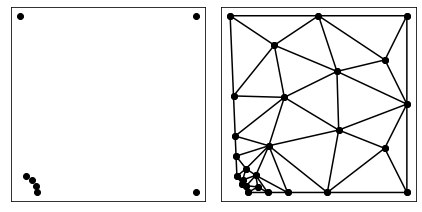

36


In [4]:
N = 4
theta = np.linspace(0,  np.pi/2, N, endpoint=False)
pts = np.stack([np.cos(theta)*0.05, np.sin(theta)*0.05], axis=1)
pts = np.vstack([pts,np.array(((0.5, 0), (0, 0.5), (0.5, 0.5)))])
print(pts)
s = np.vstack([np.array([[i,i+1] for i in range(N-1)]),[0,N-1],[N,N+1],[N+1,N+2],[N+2,N+3],[N+3,N]])
A = dict(vertices=pts)
B = tr.triangulate(A, 'qa0.02')
tr.compare(plt, A, B)
plt.show()

nud = B['vertices']
nud_num = len(B['vertices'])
el = B['triangles']
el_num = len(B['triangles'])
print(el_num)

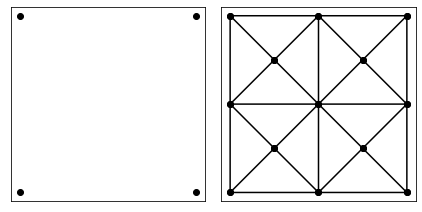

In [3]:
A = dict(vertices=np.array(((0, 0), (1, 0), (1, 1), (0, 1))))
B = tr.triangulate(A, 'qa0.1')
tr.compare(plt, A, B)
plt.show()

In [8]:
nud = B['vertices']
nud_num = len(B['vertices'])
el = B['triangles']
el_num = len(B['triangles'])
print(B['vertices'])

[[0.   0.  ]
 [1.   0.  ]
 [1.   1.  ]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.   0.5 ]
 [0.5  0.  ]
 [0.5  1.  ]
 [0.25 0.25]
 [1.   0.5 ]
 [0.25 0.75]
 [0.75 0.75]
 [0.75 0.25]]


In [ ]:
eff = np.matrix([])